In [2]:
# Section that will be used to define all the required package imports
import pandas as pd
import numpy as np
import datetime as dt
import os
from dateutil.relativedelta import relativedelta
import scipy.stats as stats
import math

import pandas_profiling
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

# For plotting bar and charts
import matplotlib.pyplot as plt


In [3]:
# to display numpy arrays as float instead of scientic numbers
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [5]:
# importing dataset
cc_raw_data = pd.read_csv("CC_GENERAL.csv")
print(cc_raw_data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

### Adding Required KPIs

In [6]:
# 1. Average Monthly Purchase Amount
cc_raw_data["Avg_Monthly_Purchase"] = cc_raw_data.PURCHASES/cc_raw_data.TENURE

In [7]:
cc_raw_data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833


In [8]:
# 2. Average Monthly Cash advance
cc_raw_data["Avg_Monthly_CashAdv"] = cc_raw_data.CASH_ADVANCE/cc_raw_data.TENURE
cc_raw_data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000


In [9]:
# 3. Transaction Type? One-off (1), Purchase (2), both (3) or none (4). 
# Instead turning it into dummy columns later, decided to keep it a numerical column to begin with

def ret_Xec_type(x,y):
    r = 0
    if x == 0 and y == 0:
        r = 4
    elif x > 0 and y == 0:
        r = 1
    elif x == 0 and y > 0:
        r = 2
    else:
        r = 3
    return r

cc_raw_data["Transaction_Type"] = cc_raw_data.apply(lambda x: ret_Xec_type(x['ONEOFF_PURCHASES'],x['INSTALLMENTS_PURCHASES']), axis = 1)
cc_raw_data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Transaction_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,1


In [10]:
# 4. Limit Usage
cc_raw_data["Limit_Usage"] = cc_raw_data.BALANCE/cc_raw_data.CREDIT_LIMIT
cc_raw_data.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Transaction_Type,Limit_Usage
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,2,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,4,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,1,0.332687


In [9]:
# Creating a Pandas Profile report and exporting the same

output = pandas_profiling.ProfileReport(cc_raw_data)

output.to_file(output_file='CC_Segmentation_FP.html')

In [108]:
#Splitting data now for training and testing
train, test = train_test_split(cc_raw_data, test_size=0.2, random_state=1)
cc_data_Train = pd.DataFrame(train, columns=cc_raw_data.columns)
cc_data_Test = pd.DataFrame(test, columns=cc_raw_data.columns)

In [13]:
# differentiating numeric columns from catagorical columns
numeric_var_names=[key for key in dict(cc_data_Train.dtypes) if dict(cc_data_Train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(cc_data_Train.dtypes) if dict(cc_data_Train.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Avg_Monthly_Purchase', 'Avg_Monthly_CashAdv', 'Transaction_Type', 'Limit_Usage']
['CUST_ID']


In [31]:
cc_data_num=cc_data_Train[numeric_var_names]
cc_data_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Transaction_Type,Limit_Usage
6130,1420.065008,1.000000,0.0,0.0,0.0,916.054835,0.000000,0.000000,0.000000,0.100000,...,0,3000.0,219.398170,289.556813,0.000000,10,0.000000,91.605483,4,0.473355
1916,859.078750,1.000000,0.0,0.0,0.0,909.986628,0.000000,0.000000,0.000000,0.166667,...,0,3500.0,1408.880515,244.822266,0.000000,12,0.000000,75.832219,4,0.245451
5884,2408.162021,1.000000,0.0,0.0,0.0,615.181965,0.000000,0.000000,0.000000,0.333333,...,0,2500.0,516.675665,810.048137,0.000000,12,0.000000,51.265164,4,0.963265
1735,993.027484,1.000000,0.0,0.0,0.0,1586.612256,0.000000,0.000000,0.000000,0.333333,...,0,1200.0,2185.377456,444.684235,0.090909,12,0.000000,132.217688,4,0.827523
1090,72.251911,0.727273,665.5,228.0,437.5,0.000000,0.416667,0.166667,0.333333,0.000000,...,12,4000.0,1443.726409,106.632133,0.500000,12,55.458333,0.000000,3,0.018063


In [32]:
cc_data_cat = cc_data_Train[cat_var_names]
cc_data_cat.head(5)

,CUST_ID
6130,C16301
1916,C11978
5884,C16050
1735,C11794
1090,C11125


In [33]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=cc_data_num.apply(lambda x: var_summary(x)).T

In [34]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,7160.0,0.0,1.121189e+07,1565.906889,867.833404,2091.117262,4.372771e+06,0.000000,0.006242,8.591100,23.260391,124.575405,867.833404,2065.563397,4350.925882,5906.451004,9347.038341,18495.558550
BALANCE_FREQUENCY,7160.0,0.0,6.262343e+03,0.874629,1.000000,0.239387,5.730624e-02,0.000000,0.090909,0.272727,0.454545,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,7160.0,0.0,7.004774e+06,978.320370,362.245000,2046.859042,4.189632e+06,0.000000,0.000000,0.000000,0.000000,37.000000,362.245000,1081.500000,2490.336000,3914.282500,8645.095800,41050.400000
ONEOFF_PURCHASES,7160.0,0.0,4.093753e+06,571.753173,35.000000,1572.122817,2.471570e+06,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,560.055000,1566.500000,2577.824500,6371.380900,40624.060000
INSTALLMENTS_PURCHASES,7160.0,0.0,2.913297e+06,406.885038,89.475000,890.335632,7.926975e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.475000,469.632500,1139.325000,1718.453500,3585.332100,22500.000000
CASH_ADVANCE,7160.0,0.0,7.119522e+06,994.346632,0.000000,2089.435976,4.365743e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1125.307197,3143.891773,4754.942432,9759.870840,29282.109150
PURCHASES_FREQUENCY,7160.0,0.0,3.493128e+03,0.487867,0.500000,0.401472,1.611802e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,7160.0,0.0,1.432053e+03,0.200007,0.083333,0.296639,8.799482e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.250000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,7160.0,0.0,2.602716e+03,0.363508,0.166667,0.396983,1.575956e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,7160.0,0.0,9.690683e+02,0.135345,0.000000,0.200459,4.018396e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


### Handling missings

#### 1. Missing for Credit Limit
Only 1 row is missing Credit Limit data, we can remove the row without any adverse effect

In [35]:
cc_data_num = cc_data_num[pd.notnull(cc_data_num['CREDIT_LIMIT'])]

#### 2. Missings for Minimum Payment Column
This is the only other column having blanks <br><br>
Handling such that if Payment value is 0 for a customer, min payment is 0 as well.<br>
Otherwise we will substitute median value for the rest of the missing

In [36]:

cc_data_num.loc[cc_data_num.PAYMENTS == 0, 'MINIMUM_PAYMENTS'] = 0

# Imputing rest of the blanks in min payment by replacing with median data
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

cc_data_num=cc_data_num.apply(lambda x: Missing_imputation(x))
cc_data_num.head(56)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Transaction_Type,Limit_Usage
6130,1420.065008,1.000000,0.00,0.00,0.00,916.054835,0.000000,0.000000,0.000000,0.100000,...,0,3000.0,219.398170,289.556813,0.000000,10,0.000000,91.605483,4,0.473355
1916,859.078750,1.000000,0.00,0.00,0.00,909.986628,0.000000,0.000000,0.000000,0.166667,...,0,3500.0,1408.880515,244.822266,0.000000,12,0.000000,75.832219,4,0.245451
5884,2408.162021,1.000000,0.00,0.00,0.00,615.181965,0.000000,0.000000,0.000000,0.333333,...,0,2500.0,516.675665,810.048137,0.000000,12,0.000000,51.265164,4,0.963265
1735,993.027484,1.000000,0.00,0.00,0.00,1586.612256,0.000000,0.000000,0.000000,0.333333,...,0,1200.0,2185.377456,444.684235,0.090909,12,0.000000,132.217688,4,0.827523
1090,72.251911,0.727273,665.50,228.00,437.50,0.000000,0.416667,0.166667,0.333333,0.000000,...,12,4000.0,1443.726409,106.632133,0.500000,12,55.458333,0.000000,3,0.018063
4897,17.092052,0.454545,1160.00,0.00,1160.00,0.000000,1.000000,0.000000,1.000000,0.000000,...,29,7000.0,1587.607855,78.175369,0.400000,12,96.666667,0.000000,2,0.002442
6155,1258.165394,1.000000,2821.76,779.26,2042.50,0.000000,1.000000,0.583333,1.000000,0.000000,...,80,4500.0,1457.330184,273.104239,0.000000,12,235.146667,0.000000,3,0.279592
588,47.424621,0.545455,372.00,273.60,98.40,0.000000,0.333333,0.166667,0.250000,0.000000,...,7,4000.0,662.401178,149.472640,0.200000,12,31.000000,0.000000,3,0.011856
660,2515.968879,1.000000,1877.24,926.90,950.34,0.000000,0.166667,0.166667,0.083333,0.000000,...,29,8500.0,4503.079430,810.909841,0.083333,12,156.436667,0.000000,3,0.295996
7908,3.164023,0.454545,51.73,0.00,51.73,0.000000,0.416667,0.000000,0.416667,0.000000,...,5,4000.0,77.666427,26.092644,0.000000,12,4.310833,0.000000,2,0.000791


### Dropping columns
Dropping those columns that are not actually numeric in nature like Transaction type

In [37]:
cc_data_num.drop(['Transaction_Type'], axis=1, inplace=True)

In [38]:
cc_data_num_col = cc_data_num.columns.tolist()
cc_data_num_col

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Avg_Monthly_Purchase',
 'Avg_Monthly_CashAdv',
 'Limit_Usage']

### Capping outliers to 5th and 95th percentile

In [39]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

cc_data_num=cc_data_num.apply(lambda x: outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Standardizing the dataset

In [51]:
sc=StandardScaler()
cc_data_scaled=sc.fit_transform(cc_data_num)
cc_data_scaled = pd.DataFrame(cc_data_scaled)
cc_data_scaled.columns = cc_data_num_col
cc_data_scaled.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Limit_Usage
0,-0.019303,0.540636,-0.751208,-0.601002,-0.679933,0.060081,-1.215489,-0.674360,-0.915857,-0.157129,-0.171548,-0.807807,-0.425445,-0.789200,-0.462716,-0.524812,-1.444548,-0.758381,0.131801,0.262692
1,-0.350203,0.540636,-0.751208,-0.601002,-0.679933,0.055679,-1.215489,-0.674360,-0.915857,0.220605,-0.171548,-0.807807,-0.269001,-0.044790,-0.525782,-0.524812,0.378871,-0.758381,0.005904,-0.396516
2,0.563529,0.540636,-0.751208,-0.601002,-0.679933,-0.158162,-1.215489,-0.674360,-0.915857,1.164932,0.525846,-0.807807,-0.581889,-0.603156,0.271059,-0.524812,0.378871,-0.758381,-0.190182,1.679748
3,-0.271193,0.540636,-0.751208,-0.601002,-0.679933,0.546481,-1.215489,-0.674360,-0.915857,1.164932,2.850493,-0.807807,-0.988644,0.441163,-0.244022,-0.212226,0.378871,-0.758381,0.455954,1.287117
4,-0.814315,-0.698301,-0.133889,-0.285678,0.207128,-0.604395,-0.177535,-0.112492,-0.076143,-0.723727,-0.636477,-0.028922,-0.112558,-0.022982,-0.720599,1.194413,0.378871,-0.156768,-0.599363,-1.054233


### Applying the PCA

In [41]:
cc_data_scaled.shape

(7159, 20)

In [42]:
pca = PCA(n_components=20)
pca.fit(cc_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.explained_variance_

array([6.207474, 4.993559, 1.783336, 1.481044, 1.140002, 0.877854,
       0.743858, 0.667900, 0.491948, 0.437026, 0.314464, 0.243991,
       0.204181, 0.151528, 0.105398, 0.075149, 0.046672, 0.026837,
       0.007004, 0.003569])

In [44]:
pca_var = pca.explained_variance_ratio_
pca_var

array([0.310330, 0.249643, 0.089154, 0.074042, 0.056992, 0.043887,
       0.037188, 0.033390, 0.024594, 0.021848, 0.015721, 0.012198,
       0.010208, 0.007575, 0.005269, 0.003757, 0.002333, 0.001342,
       0.000350, 0.000178])

In [45]:
#Cumulative Variance explains
pca_var_pct=np.cumsum(np.round(pca_var, decimals=4)*100)
pca_var_pct

array([31.030000, 55.990000, 64.910000, 72.310000, 78.010000, 82.400000,
       86.120000, 89.460000, 91.920000, 94.100000, 95.670000, 96.890000,
       97.910000, 98.670000, 99.200000, 99.580000, 99.810000, 99.940000,
       99.980000, 100.000000])

##### Choosing first 9 Principle Components as they are explaining approx 92% of the cumulative variance, and also each component explains more than 50% of the variance

In [52]:
pca_final=PCA(n_components=9).fit(cc_data_scaled)
pca_final.explained_variance_

array([6.207474, 4.993559, 1.783336, 1.481044, 1.140002, 0.877854,
       0.743858, 0.667900, 0.491948])

In [53]:
reduced_cr=pca_final.transform(cc_data_scaled)
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8","C9"]
dimensions

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,-2.313645,-0.811510,-0.194704,0.307089,1.025967,0.588176,0.616071,0.332825,0.965738
1,-2.017427,-0.760761,0.089185,0.549684,-0.345732,-0.609942,-0.137140,-0.019104,1.037162
2,-2.681132,0.490667,-1.393120,0.720125,0.301207,-0.596089,-0.347265,0.457868,-0.019144
3,-3.041382,1.281372,-0.002363,-0.142987,0.772721,-1.763946,-1.208844,0.457263,0.044801
4,0.544715,-2.009117,0.896545,-0.180455,-0.777536,-0.270931,-0.073170,0.491488,-0.104492
5,2.370738,-1.732775,0.751661,-2.114681,-1.478335,0.862032,-0.630561,-0.651597,-0.437901
6,4.951624,0.317174,-1.021692,-0.779335,0.455843,0.194241,-0.792879,-1.087091,0.571316
7,-0.349412,-2.323619,0.906285,0.426110,-0.717514,0.299832,-0.309239,-0.463435,-0.476722
8,1.997628,0.953755,0.137799,1.309642,-1.305099,0.779628,-0.538544,0.839103,1.579105
9,-0.880260,-2.693287,0.567885,-0.076056,-0.872503,0.694543,-0.511134,-1.206254,-0.456463


In [48]:
# Now getting the Loading matrix to get the final list of features
Loadings =  pd.DataFrame((pca_final.components_.T * np.sqrt(pca_final.explained_variance_)).T,columns=cc_data_scaled.columns).T
Loadings.to_csv("Loadings.csv")

In [49]:
#List of final variables after conducting PCA and Load metrics analysis
final_var_list = ["Avg_Monthly_Purchase","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","BALANCE","Avg_Monthly_CashAdv","CASH_ADVANCE_FREQUENCY","Limit_Usage","TENURE","PRC_FULL_PAYMENT"]

In [54]:
# Subsetting the scaled dataset to include only the final variable list
cc_data_scaled_final=pd.DataFrame(cc_data_scaled, columns=cc_data_num.columns)
cc_data_scaled_final=cc_data_scaled_final[final_var_list]
cc_data_scaled_final.head(5)

,Avg_Monthly_Purchase,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,BALANCE,Avg_Monthly_CashAdv,CASH_ADVANCE_FREQUENCY,Limit_Usage,TENURE,PRC_FULL_PAYMENT
0,-0.758381,-0.674360,-0.915857,-0.019303,0.131801,-0.157129,0.262692,-1.444548,-0.524812
1,-0.758381,-0.674360,-0.915857,-0.350203,0.005904,0.220605,-0.396516,0.378871,-0.524812
2,-0.758381,-0.674360,-0.915857,0.563529,-0.190182,1.164932,1.679748,0.378871,-0.524812
3,-0.758381,-0.674360,-0.915857,-0.271193,0.455954,1.164932,1.287117,0.378871,-0.212226
4,-0.156768,-0.112492,-0.076143,-0.814315,-0.599363,-0.723727,-1.054233,0.378871,1.194413


### Segmentation

In [55]:
# Creating 3 to 8 clusters for further analysis
km_3=KMeans(n_clusters=3,random_state=123).fit(cc_data_scaled_final)
km_4=KMeans(n_clusters=4,random_state=123).fit(cc_data_scaled_final)
km_5=KMeans(n_clusters=5,random_state=123).fit(cc_data_scaled_final)
km_6=KMeans(n_clusters=6,random_state=123).fit(cc_data_scaled_final)
km_7=KMeans(n_clusters=7,random_state=123).fit(cc_data_scaled_final)
km_8=KMeans(n_clusters=8,random_state=123).fit(cc_data_scaled_final)


In [56]:
k_range = range(3, 9)
Silhoutte_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(cc_data_scaled_final)
    Silhoutte_scores.append(metrics.silhouette_score(cc_data_scaled_final, km.labels_))

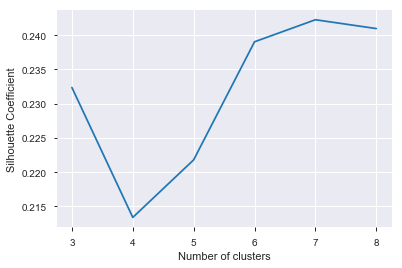

In [57]:
plt.plot(k_range, Silhoutte_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [58]:
# Getting silhoutte score for the clusters created
print("Silhoutte Scores for various clusters")
print("For 3 Clusters: ",metrics.silhouette_score(cc_data_scaled_final, km_3.labels_))
print("For 4 Clusters: ",metrics.silhouette_score(cc_data_scaled_final, km_4.labels_))
print("For 5 Clusters: ",metrics.silhouette_score(cc_data_scaled_final, km_5.labels_))
print("For 6 Clusters: ",metrics.silhouette_score(cc_data_scaled_final, km_6.labels_))
print("For 7 Clusters: ",metrics.silhouette_score(cc_data_scaled_final, km_7.labels_))
print("For 8 Clusters: ",metrics.silhouette_score(cc_data_scaled_final, km_8.labels_))

Silhoutte Scores for various clusters
For 3 Clusters:  0.23235896493554414
For 4 Clusters:  0.21339120073674364
For 5 Clusters:  0.22179725946581402
For 6 Clusters:  0.2390404075668413
For 7 Clusters:  0.2422597391960395
For 8 Clusters:  0.24097065004075363


#### 7 Clusters seem to have the highest relative Silhoutte Score

In [59]:
# To create a profile report,we will add the cluster labels to the Original dataset

cc_data_num['cluster_3'] = km_3.labels_
cc_data_num['cluster_4'] = km_4.labels_
cc_data_num['cluster_5'] = km_5.labels_
cc_data_num['cluster_6'] = km_6.labels_
cc_data_num['cluster_7'] = km_7.labels_
cc_data_num['cluster_8'] = km_8.labels_

size=pd.concat([pd.Series(cc_data_num.cluster_3.size), pd.Series.sort_index(cc_data_num.cluster_3.value_counts()), pd.Series.sort_index(cc_data_num.cluster_4.value_counts()),
           pd.Series.sort_index(cc_data_num.cluster_5.value_counts()), pd.Series.sort_index(cc_data_num.cluster_6.value_counts()),
           pd.Series.sort_index(cc_data_num.cluster_7.value_counts()), pd.Series.sort_index(cc_data_num.cluster_8.value_counts())])
size=pd.concat([pd.Series(cc_data_num.cluster_3.size), pd.Series.sort_index(cc_data_num.cluster_3.value_counts()), pd.Series.sort_index(cc_data_num.cluster_4.value_counts()),
           pd.Series.sort_index(cc_data_num.cluster_5.value_counts()), pd.Series.sort_index(cc_data_num.cluster_6.value_counts()),
           pd.Series.sort_index(cc_data_num.cluster_7.value_counts()), pd.Series.sort_index(cc_data_num.cluster_8.value_counts())])

cc_data_num.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Limit_Usage,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
6130,1420.065008,1.000000,0.0,0.0,0.0,916.054835,0.000000,0.000000,0.000000,0.100000,...,10,0.000000,91.605483,0.473355,0,3,0,0,4,5
1916,859.078750,1.000000,0.0,0.0,0.0,909.986628,0.000000,0.000000,0.000000,0.166667,...,12,0.000000,75.832219,0.245451,2,3,0,1,1,7
5884,2408.162021,1.000000,0.0,0.0,0.0,615.181965,0.000000,0.000000,0.000000,0.333333,...,12,0.000000,51.265164,0.963265,0,3,0,3,3,0
1735,993.027484,1.000000,0.0,0.0,0.0,1586.612256,0.000000,0.000000,0.000000,0.333333,...,12,0.000000,132.217688,0.827523,0,3,0,3,3,0
1090,72.251911,0.727273,665.5,228.0,437.5,0.000000,0.416667,0.166667,0.333333,0.000000,...,12,55.458333,0.000000,0.018063,2,0,4,1,2,4


In [60]:
# Size of each cluster is being determined here
size=pd.concat([pd.Series(cc_data_num.cluster_3.size), pd.Series.sort_index(cc_data_num.cluster_3.value_counts()), pd.Series.sort_index(cc_data_num.cluster_4.value_counts()),
           pd.Series.sort_index(cc_data_num.cluster_5.value_counts()), pd.Series.sort_index(cc_data_num.cluster_6.value_counts()),
           pd.Series.sort_index(cc_data_num.cluster_7.value_counts()), pd.Series.sort_index(cc_data_num.cluster_8.value_counts())])
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,7159,2417,1289,3453,2652,1188,1224,2095,2723,1238,...,1020,498,1426,984,415,953,667,517,651,1546


In [61]:
# Segment % to be calculated
Seg_Pct = pd.DataFrame(size/cc_data_num.cluster_3.size, columns=['Seg_Pct'])
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.337617,0.180053,0.48233,0.370443,0.165945,0.170974,0.292639,0.38036,0.172929,...,0.142478,0.069563,0.19919,0.137449,0.057969,0.133119,0.093169,0.072217,0.090934,0.215952


In [62]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([cc_data_num.apply(lambda x: x.mean()).T, cc_data_num.groupby('cluster_3').apply(lambda x: x.mean()).T, cc_data_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          cc_data_num.groupby('cluster_5').apply(lambda x: x.mean()).T, cc_data_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          cc_data_num.groupby('cluster_7').apply(lambda x: x.mean()).T, cc_data_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1452.790575,2759.655015,1644.732055,466.371832,197.491639,1566.149026,3514.420620,1773.052036,1177.079891,3774.320976,...,3844.155590,395.718139,1900.493649,797.634362,367.001239,3997.888103,75.417231,754.767616,2898.756926,398.221077
BALANCE_FREQUENCY,0.880990,0.958306,0.973574,0.792309,0.736886,0.972673,0.943201,0.975070,0.878389,0.970887,...,0.964927,0.958095,0.988423,0.913396,0.962310,0.966705,0.784854,0.772429,0.989049,0.718882
PURCHASES,809.839194,330.284156,2555.439763,493.883617,508.044091,2620.704137,475.778419,360.170196,344.756721,503.396195,...,419.641701,2293.873886,227.083640,880.523664,2530.819964,452.795467,717.019483,363.731006,2890.805753,373.455627
ONEOFF_PURCHASES,434.563293,183.611625,1571.879532,185.663654,180.543879,1617.665899,265.504752,183.995866,204.854039,272.342963,...,234.688904,1556.829161,156.999944,198.174675,1665.511092,250.520702,99.051454,219.087091,1750.507353,286.742462
INSTALLMENTS_PURCHASES,335.343904,138.291871,796.351492,301.181141,318.557074,813.225696,188.842485,171.197288,137.671729,209.524868,...,172.448871,597.674906,70.373121,647.239275,695.249246,189.266340,574.812831,136.047132,935.188327,85.412745
CASH_ADVANCE,833.226521,2076.262701,319.906271,154.758915,141.630778,258.627952,3358.795019,558.973141,423.909826,3160.807069,...,3507.021141,94.548727,631.796932,129.698653,99.461453,3613.869268,53.902078,1013.479955,588.144230,328.851961
PURCHASES_FREQUENCY,0.487935,0.237093,0.914582,0.504251,0.525335,0.918764,0.281501,0.316892,0.272284,0.302260,...,0.268850,0.926110,0.194609,0.906270,0.925629,0.286468,0.720500,0.377918,0.919312,0.253737
ONEOFF_PURCHASES_FREQUENCY,0.200035,0.093928,0.697597,0.088568,0.084826,0.706069,0.121197,0.104984,0.101977,0.123059,...,0.110487,0.841536,0.096603,0.094488,0.825706,0.115354,0.052695,0.115977,0.662040,0.144001
PURCHASES_INSTALLMENTS_FREQUENCY,0.363559,0.158005,0.605602,0.417086,0.438355,0.616872,0.193399,0.224646,0.178053,0.217488,...,0.182410,0.471129,0.102944,0.869900,0.522785,0.197201,0.656337,0.251576,0.700367,0.110781
CASH_ADVANCE_FREQUENCY,0.127732,0.305644,0.055513,0.030157,0.025499,0.047698,0.407575,0.139032,0.093593,0.403493,...,0.414559,0.018856,0.170039,0.030052,0.020418,0.415933,0.006916,0.179591,0.093358,0.051288


In [63]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,7159.000000,2417.000000,1289.000000,3453.000000,2652.000000,1188.000000,1224.000000,2095.000000,2723.000000,1238.000000,...,1020.000000,498.000000,1426.000000,984.000000,415.000000,953.000000,667.000000,517.000000,651.000000,1546.000000
Seg_Pct,1.000000,0.337617,0.180053,0.482330,0.370443,0.165945,0.170974,0.292639,0.380360,0.172929,...,0.142478,0.069563,0.199190,0.137449,0.057969,0.133119,0.093169,0.072217,0.090934,0.215952
BALANCE,1452.790575,2759.655015,1644.732055,466.371832,197.491639,1566.149026,3514.420620,1773.052036,1177.079891,3774.320976,...,3844.155590,395.718139,1900.493649,797.634362,367.001239,3997.888103,75.417231,754.767616,2898.756926,398.221077
BALANCE_FREQUENCY,0.880990,0.958306,0.973574,0.792309,0.736886,0.972673,0.943201,0.975070,0.878389,0.970887,...,0.964927,0.958095,0.988423,0.913396,0.962310,0.966705,0.784854,0.772429,0.989049,0.718882
PURCHASES,809.839194,330.284156,2555.439763,493.883617,508.044091,2620.704137,475.778419,360.170196,344.756721,503.396195,...,419.641701,2293.873886,227.083640,880.523664,2530.819964,452.795467,717.019483,363.731006,2890.805753,373.455627
ONEOFF_PURCHASES,434.563293,183.611625,1571.879532,185.663654,180.543879,1617.665899,265.504752,183.995866,204.854039,272.342963,...,234.688904,1556.829161,156.999944,198.174675,1665.511092,250.520702,99.051454,219.087091,1750.507353,286.742462
INSTALLMENTS_PURCHASES,335.343904,138.291871,796.351492,301.181141,318.557074,813.225696,188.842485,171.197288,137.671729,209.524868,...,172.448871,597.674906,70.373121,647.239275,695.249246,189.266340,574.812831,136.047132,935.188327,85.412745
CASH_ADVANCE,833.226521,2076.262701,319.906271,154.758915,141.630778,258.627952,3358.795019,558.973141,423.909826,3160.807069,...,3507.021141,94.548727,631.796932,129.698653,99.461453,3613.869268,53.902078,1013.479955,588.144230,328.851961
PURCHASES_FREQUENCY,0.487935,0.237093,0.914582,0.504251,0.525335,0.918764,0.281501,0.316892,0.272284,0.302260,...,0.268850,0.926110,0.194609,0.906270,0.925629,0.286468,0.720500,0.377918,0.919312,0.253737
ONEOFF_PURCHASES_FREQUENCY,0.200035,0.093928,0.697597,0.088568,0.084826,0.706069,0.121197,0.104984,0.101977,0.123059,...,0.110487,0.841536,0.096603,0.094488,0.825706,0.115354,0.052695,0.115977,0.662040,0.144001


In [64]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,7159.000000,2417.000000,1289.000000,3453.000000,2652.000000,1188.000000,1224.000000,2095.000000,2723.000000,1238.000000,...,1020.000000,498.000000,1426.000000,984.000000,415.000000,953.000000,667.000000,517.000000,651.000000,1546.000000
Seg_Pct,1.000000,0.337617,0.180053,0.482330,0.370443,0.165945,0.170974,0.292639,0.380360,0.172929,...,0.142478,0.069563,0.199190,0.137449,0.057969,0.133119,0.093169,0.072217,0.090934,0.215952
BALANCE,1452.790575,2759.655015,1644.732055,466.371832,197.491639,1566.149026,3514.420620,1773.052036,1177.079891,3774.320976,...,3844.155590,395.718139,1900.493649,797.634362,367.001239,3997.888103,75.417231,754.767616,2898.756926,398.221077
BALANCE_FREQUENCY,0.880990,0.958306,0.973574,0.792309,0.736886,0.972673,0.943201,0.975070,0.878389,0.970887,...,0.964927,0.958095,0.988423,0.913396,0.962310,0.966705,0.784854,0.772429,0.989049,0.718882
PURCHASES,809.839194,330.284156,2555.439763,493.883617,508.044091,2620.704137,475.778419,360.170196,344.756721,503.396195,...,419.641701,2293.873886,227.083640,880.523664,2530.819964,452.795467,717.019483,363.731006,2890.805753,373.455627
ONEOFF_PURCHASES,434.563293,183.611625,1571.879532,185.663654,180.543879,1617.665899,265.504752,183.995866,204.854039,272.342963,...,234.688904,1556.829161,156.999944,198.174675,1665.511092,250.520702,99.051454,219.087091,1750.507353,286.742462
INSTALLMENTS_PURCHASES,335.343904,138.291871,796.351492,301.181141,318.557074,813.225696,188.842485,171.197288,137.671729,209.524868,...,172.448871,597.674906,70.373121,647.239275,695.249246,189.266340,574.812831,136.047132,935.188327,85.412745
CASH_ADVANCE,833.226521,2076.262701,319.906271,154.758915,141.630778,258.627952,3358.795019,558.973141,423.909826,3160.807069,...,3507.021141,94.548727,631.796932,129.698653,99.461453,3613.869268,53.902078,1013.479955,588.144230,328.851961
PURCHASES_FREQUENCY,0.487935,0.237093,0.914582,0.504251,0.525335,0.918764,0.281501,0.316892,0.272284,0.302260,...,0.268850,0.926110,0.194609,0.906270,0.925629,0.286468,0.720500,0.377918,0.919312,0.253737
ONEOFF_PURCHASES_FREQUENCY,0.200035,0.093928,0.697597,0.088568,0.084826,0.706069,0.121197,0.104984,0.101977,0.123059,...,0.110487,0.841536,0.096603,0.094488,0.825706,0.115354,0.052695,0.115977,0.662040,0.144001


In [65]:
Profling_output_final.to_csv('Profiling_output.csv')

## Results and further Insights into the Cluster Analysis:

Based on the higher Silhoutte Score and distribution of data in each cluster, the <b>K=7</b> Cluster seems to be the best fit.<br>
Following are the details on how each cluster differentiates:<br>
#### Cluster 1 - User with High usage with good payment habits - GOLD
- These users are high usage customers (no cash advances)
- Though they rarely make full payments on their card, they are very regular with their minimum amount payments
- These users can be encouraged further by 
> _a._ giving them re-payment option in installments<br>
> _b._ Incentivizing their loyalty by adding loyalty point benefits<br>
> _c._ Giving them personalized offer based on their spending habits (travel,apparel,dining etc.)

#### Cluster 2 - User with Low usage and bad re-payment habits
- These users seem to be irregular users with irregular payment activities.
- They should be flagged and tracked for recovering the payable amounts

#### Cluster 3 - Installment user with average re-payment habits - SILVER
- These users are utilizing the Installment facilities to the max and keeping up with their payment judiciously.
- It would be prudent to provide the users with some offers on <b> No Cost EMI </b> or <b>low interest EMIs</b>. This may help convert them to GOLD users.<br>

#### Cluster 4 -  User with low usage and irregular payment habits - HIGHER USAGE POTENTIAL
- The users have low utilization of card but high limit usage. 
>This implies they could have utilized their card limit in previous year and are slowly keeping up with the minimum payment required.
- They could be targetted to have their <b>Credit limit increased</b> as they are keeping up with re-payments.

#### Cluster 5 - Cash user with poor re-payment activities - 
- These user should be flagged, as they are using a high interest facility - cash advances, without proper re-payment habits.
- They are also particular about not completely using their credit limit.

#### Cluster 6 - Cash user with good re-payment habits - HIGHER USAGE POTENTIAL
- These users are utilizing the cash advance facility to the maximum
- They are also keeping up regularly with their payments.
- As of now their limit usage is higher, so they will be good candidates to get <b> Increased Credit Limit </b>

#### Cluster 7 - User with High usage and also higher credit limit - GOLD
- Users with High usage (not cash advances) and very good re-payment habit.(Could they be corporate card users?)
- These users also have a higher than average Credit Limit
- But they rarely utilize their credit limit proportionately more.
- They should be targetted to utilize their credit limit more by
> _a._ providing more offers on their card, by analyzing which department they spend more in (travel, apparel, dining etc.) <br>
> _b._ incentivize their card utilization by increasing the loyalty points they gain by using the card




In [66]:
cc_data_num.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Avg_Monthly_Purchase                float64
Avg_Monthly_CashAdv                 float64
Limit_Usage                         float64
cluster_3                             int32
cluster_4                             int32
cluster_5                       

In [75]:
cc_data_num[cc_data_num.cluster_7==0].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Limit_Usage,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
6155,1258.165394,1.0,2821.760,779.260,1718.937,0.000000,1.000000,0.583333,1.000000,0.000000,...,12,235.146667,0.000000,0.279592,1,1,3,4,0,6
7330,2479.815703,1.0,3914.415,2577.949,669.600,638.563709,0.916667,0.750000,0.416667,0.083333,...,12,333.341500,53.213642,0.236173,1,1,3,4,0,6
2987,2135.406047,1.0,1600.090,1425.130,174.960,78.600122,0.833333,0.666667,0.250000,0.083333,...,12,133.340833,6.550010,0.854162,1,3,3,4,0,6
231,279.608696,1.0,3034.920,0.000,1718.937,0.000000,1.000000,0.000000,1.000000,0.000000,...,12,252.910000,0.000000,0.096417,2,0,4,4,0,1
7598,2471.904646,1.0,1590.580,1590.580,0.000,283.730479,0.583333,0.583333,0.000000,0.166667,...,12,132.548333,23.644207,0.380293,1,3,0,4,0,6


## Assigning the newly created model to the test data

In [109]:
# Just creating a copy of the test data.... in case of mishap :P
cc_data_Test1 = cc_data_Test.copy()


cc_data_Test = cc_data_Test.reset_index()
cc_data_Test.head()

,index,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Transaction_Type,Limit_Usage
0,4248,C14366,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,...,16,4000.0,549.682725,254.640736,0.000000,12,79.199167,28.359072,3,0.142664
1,7432,C17635,578.795795,0.545455,994.12,105.00,889.12,2578.563752,0.833333,0.166667,...,12,2500.0,2369.347633,114.089533,0.000000,12,82.843333,214.880313,3,0.231518
2,4668,C14795,8248.178009,1.000000,1788.84,0.00,1788.84,90.031207,1.000000,0.000000,...,12,18000.0,40627.595240,2149.990102,0.166667,12,149.070000,7.502601,2,0.458232
3,5339,C15491,5.168354,0.181818,69.00,29.00,40.00,0.000000,0.083333,0.083333,...,3,5000.0,167.350713,41.839613,0.181818,12,5.750000,0.000000,3,0.001034
4,2031,C12094,876.577775,1.000000,1029.94,0.00,1029.94,0.000000,1.000000,0.000000,...,18,2000.0,2221.896121,227.640560,0.000000,12,85.828333,0.000000,2,0.438289


In [111]:
#Aligning Test data to Train data's setup
cc_data_Test_x = cc_data_Test.copy()
cc_data_Test_x.drop(['Transaction_Type','CUST_ID','index'], axis=1, inplace=True)
cc_data_Test_col = cc_data_Test_x.columns.tolist()
cc_data_Test_col

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Avg_Monthly_Purchase',
 'Avg_Monthly_CashAdv',
 'Limit_Usage']

In [112]:
# Standardizing the test dataset
cc_data__test_scaled=sc.fit_transform(cc_data_Test_x)
cc_data__test_scaled = pd.DataFrame(cc_data__test_scaled)
cc_data__test_scaled.columns = cc_data_num_col
cc_data__test_scaled.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Limit_Usage
0,-0.483709,0.495431,-0.061915,-0.068431,-0.018545,-0.271157,0.830939,0.670562,-0.087213,0.162632,-0.174563,0.014965,-0.144743,-0.362716,-0.234120,-0.528843,0.359675,-0.075449,-0.282513,-0.701028
1,-0.479725,-1.512341,-0.044143,-0.289419,0.481489,0.781315,0.830939,-0.149563,1.165044,3.097464,4.358475,-0.140327,-0.547528,0.158042,-0.280611,-0.528843,0.359675,-0.057967,0.673134,-0.452784
2,3.274741,0.495431,0.278825,-0.342717,1.420542,-0.388843,1.246765,-0.696315,1.582464,-0.256634,-0.330874,-0.140327,3.614587,11.106913,0.392806,0.028526,0.359675,0.259751,-0.389372,0.180618
3,-0.760538,-3.118564,-0.420105,-0.327997,-0.404751,-0.431177,-1.040273,-0.422941,-0.713342,-0.675894,-0.487186,-0.489736,0.123781,-0.472133,-0.304509,0.079195,0.359675,-0.427817,-0.427812,-1.096722
4,-0.333949,0.495431,-0.029586,-0.342717,0.628466,-0.431177,1.246765,-0.696315,1.582464,-0.675894,-0.487186,0.092612,-0.681790,0.115844,-0.243051,-0.528843,0.359675,-0.043646,-0.427812,0.124900


In [113]:
final_var_list = ["Avg_Monthly_Purchase","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","BALANCE","Avg_Monthly_CashAdv","CASH_ADVANCE_FREQUENCY","Limit_Usage","TENURE","PRC_FULL_PAYMENT"]
cc_data__test_scaled=cc_data__test_scaled[final_var_list]
cc_data__test_scaled.head(5)

,Avg_Monthly_Purchase,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,BALANCE,Avg_Monthly_CashAdv,CASH_ADVANCE_FREQUENCY,Limit_Usage,TENURE,PRC_FULL_PAYMENT
0,-0.075449,0.670562,-0.087213,-0.483709,-0.282513,0.162632,-0.701028,0.359675,-0.528843
1,-0.057967,-0.149563,1.165044,-0.479725,0.673134,3.097464,-0.452784,0.359675,-0.528843
2,0.259751,-0.696315,1.582464,3.274741,-0.389372,-0.256634,0.180618,0.359675,0.028526
3,-0.427817,-0.422941,-0.713342,-0.760538,-0.427812,-0.675894,-1.096722,0.359675,0.079195
4,-0.043646,-0.696315,1.582464,-0.333949,-0.427812,-0.675894,0.124900,0.359675,-0.528843


In [114]:
cc_data__test_scaled.shape

(1790, 9)

In [115]:
def kmeans_assignment(centroids, points):
    num_centroids, dim = centroids.shape
    num_points, _ = points.shape

  # Tile and reshape both arrays into `[num_points, num_centroids, dim]`.
    centroids = np.tile(centroids, [num_points, 1]).reshape([num_points, num_centroids, dim])
    points = np.tile(points, [1, num_centroids]).reshape([num_points, num_centroids, dim])

  # Compute all distances (for all points and all centroids) at once and 
  # select the min centroid for each point.
    distances = np.sum(np.square(centroids - points), axis=2)
    return np.argmin(distances, axis=1)

In [116]:
centroids = km_7.cluster_centers_
points = cc_data__test_scaled
kmeans_assignment(centroids, points)

array([1, 5, 0, ..., 1, 5, 3], dtype=int64)

In [117]:
len(kmeans_assignment(centroids, points))

1790

In [118]:
cc_data_Test['pred_segment'] = pd.Series(kmeans_assignment(centroids, points))
cc_data_Test.head()

,index,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Avg_Monthly_Purchase,Avg_Monthly_CashAdv,Transaction_Type,Limit_Usage,pred_segment
0,4248,C14366,570.657071,1.000000,950.39,540.36,410.03,340.308868,0.833333,0.416667,...,4000.0,549.682725,254.640736,0.000000,12,79.199167,28.359072,3,0.142664,1
1,7432,C17635,578.795795,0.545455,994.12,105.00,889.12,2578.563752,0.833333,0.166667,...,2500.0,2369.347633,114.089533,0.000000,12,82.843333,214.880313,3,0.231518,5
2,4668,C14795,8248.178009,1.000000,1788.84,0.00,1788.84,90.031207,1.000000,0.000000,...,18000.0,40627.595240,2149.990102,0.166667,12,149.070000,7.502601,2,0.458232,0
3,5339,C15491,5.168354,0.181818,69.00,29.00,40.00,0.000000,0.083333,0.083333,...,5000.0,167.350713,41.839613,0.181818,12,5.750000,0.000000,3,0.001034,1
4,2031,C12094,876.577775,1.000000,1029.94,0.00,1029.94,0.000000,1.000000,0.000000,...,2000.0,2221.896121,227.640560,0.000000,12,85.828333,0.000000,2,0.438289,1


In [119]:
cc_data_Test.to_csv("Segmentation_model_test.csv")

In [120]:
cc_data_Test.pred_segment.value_counts()

1    531
3    486
2    188
5    183
0    154
4    131
6    117
Name: pred_segment, dtype: int64